In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV


In [3]:
data = pd.read_csv("/kaggle/input/physical-activity/Physical Activity.csv")

In [4]:
data.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


In [5]:
data = data[data['activityID'] != 'transient activities']

In [6]:
data.drop(columns=['PeopleId'],inplace=True)

In [8]:
null_values = data.isnull().sum()


In [9]:
data.dropna(inplace=True)

In [10]:
y=data['activityID']

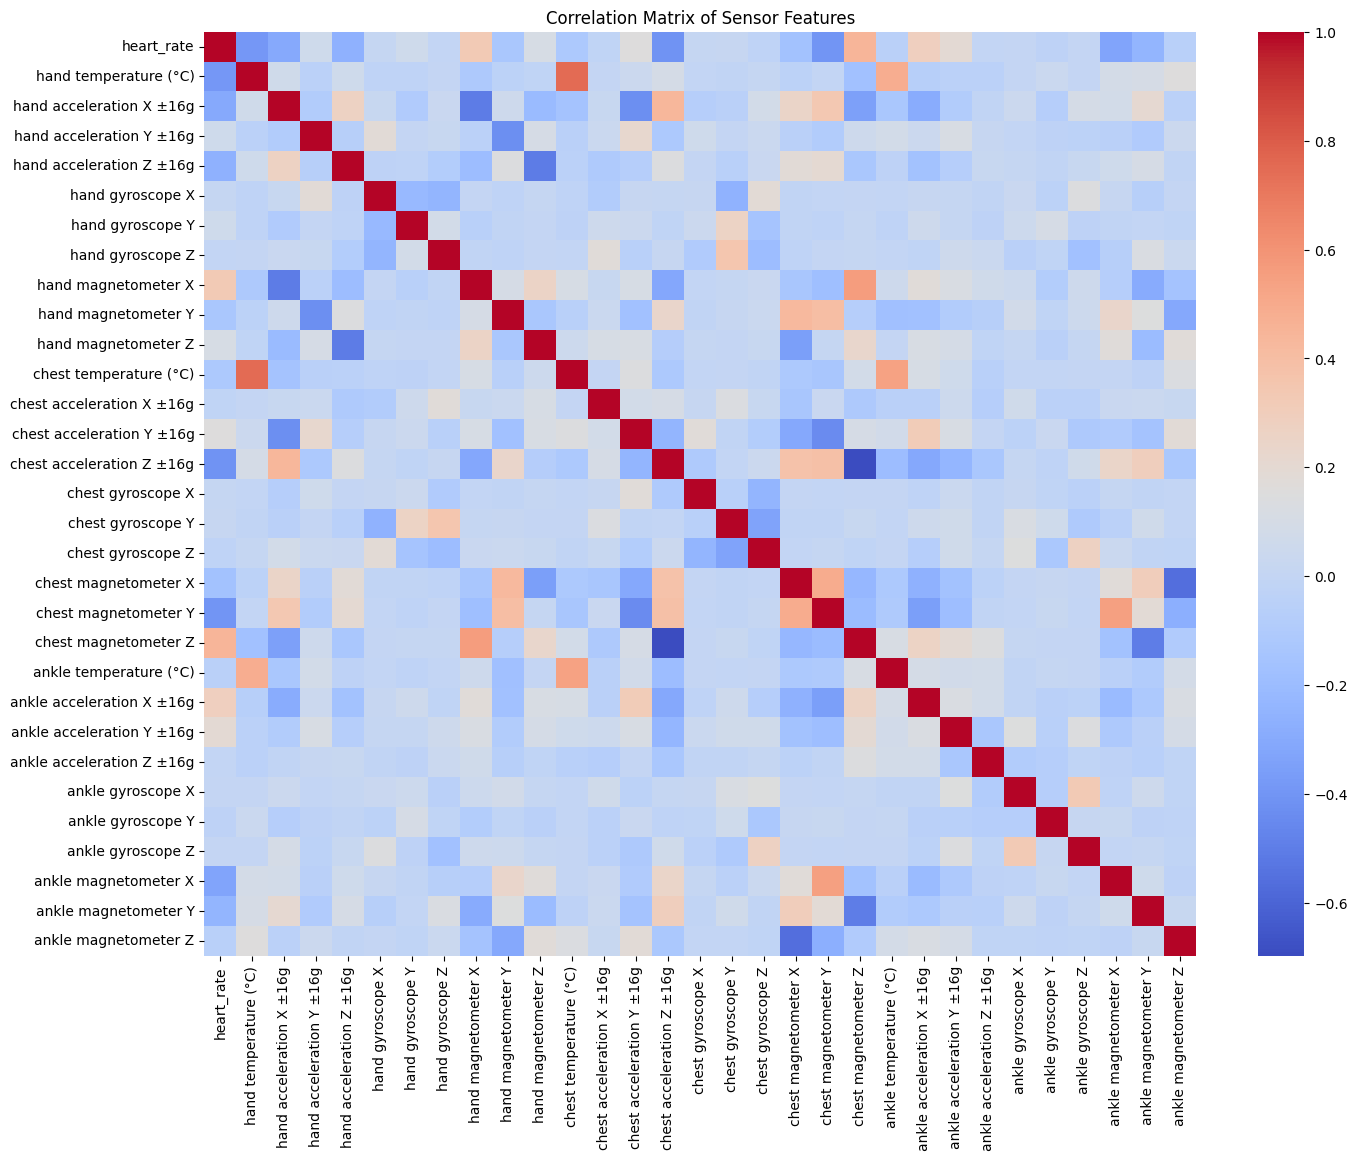

In [11]:
# Correlation Matrix
correlation_matrix = data.iloc[:,1:].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Sensor Features")
plt.show()

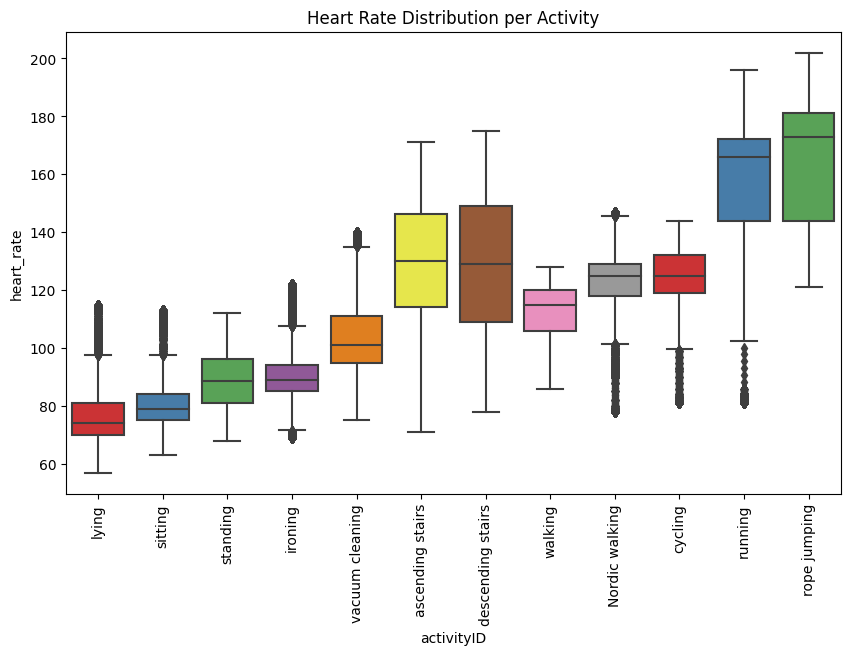

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activityID', y='heart_rate', data=data,palette='Set1')
plt.title("Heart Rate Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

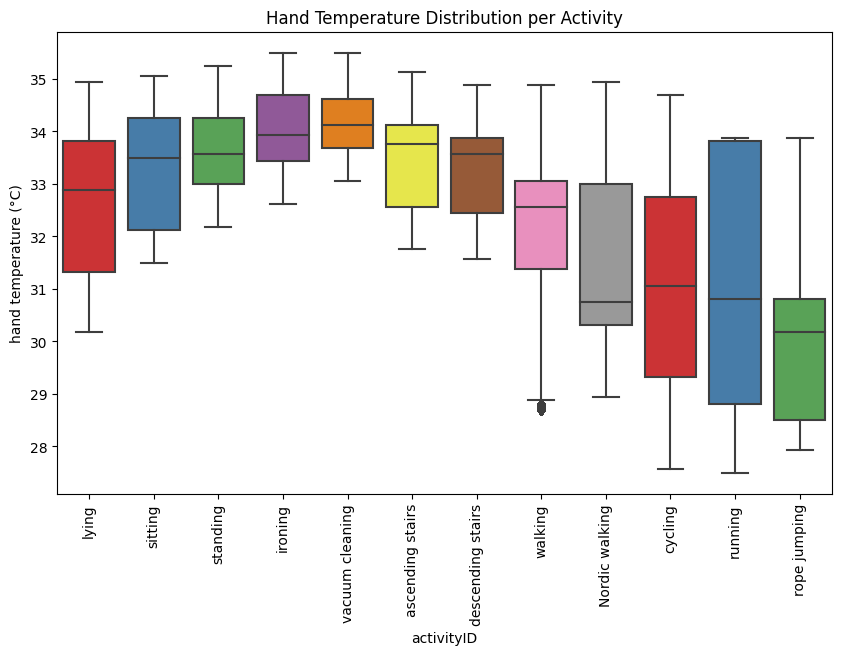

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activityID', y='hand temperature (°C)', data=data,palette='Set1')
plt.title("Hand Temperature Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

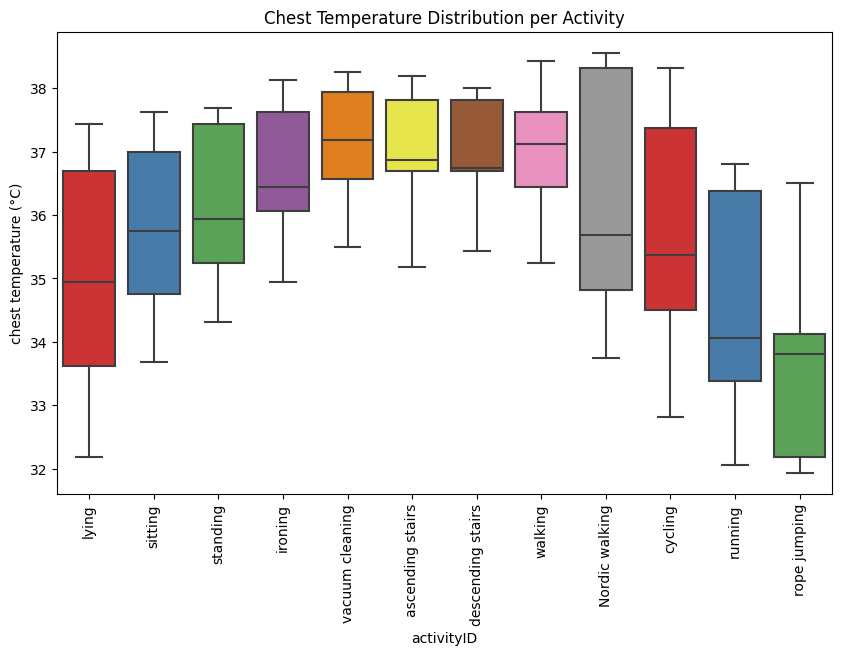

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activityID', y='chest temperature (°C)', data=data,palette='Set1')
plt.title("Chest Temperature Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

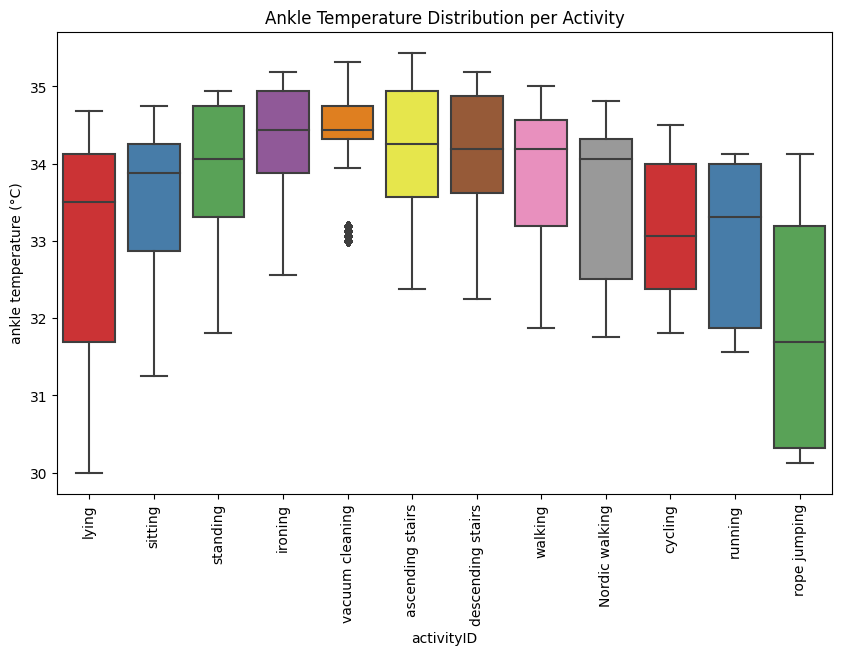

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activityID', y='ankle temperature (°C)', data=data,palette='Set1')
plt.title("Ankle Temperature Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

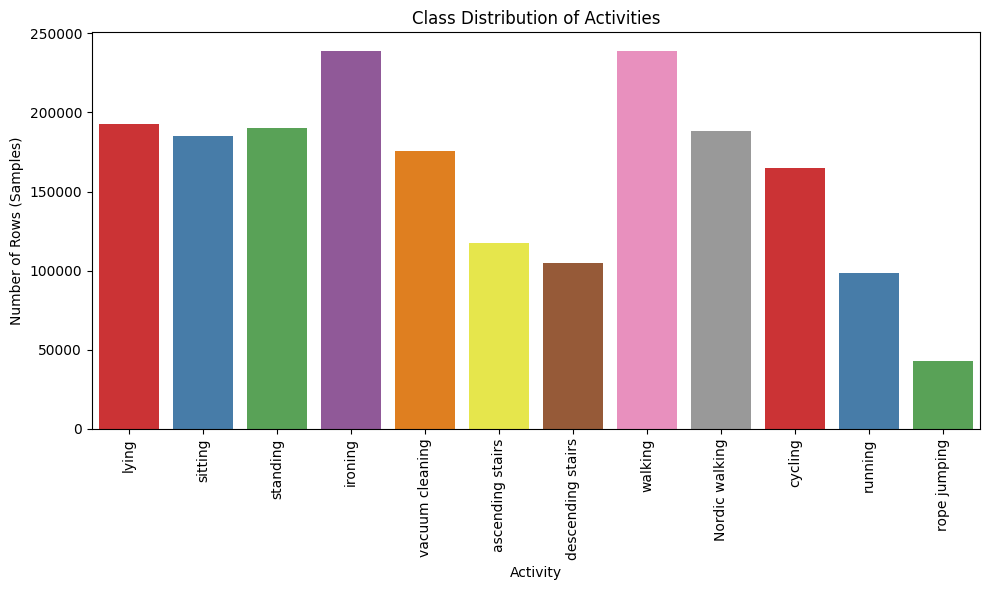

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='activityID',data=data,palette='Set1')
plt.title("Class Distribution of Activities")
plt.xlabel("Activity")
plt.ylabel("Number of Rows (Samples)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
